In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(
    r'C:\Users\micha\project\data\processed\job_offers_14-11-2021.csv',
    sep=';',
    encoding='utf-8',
)
df

,name,company,technology,job,location_city,location_country,salary_low,salary_high,salary_currency,salary_average,is_senior
0,data scientist,Kontomatik Sp. z o.o.,python,data analyst,warszawa,POL,8 000,12 000,PLN,10000.0,False
1,data analyst,Ringier Axel Springer Tech,NaN,data analyst,zdalna,NaN,9 000,13 000,PLN,11000.0,False
2,senior data mining analyst,McKinsey & Company,NaN,data analyst,wrocław,POL,9 000,14 000,PLN,11500.0,True
3,data analyst,Devire,NaN,data analyst,zdalna,NaN,8 000,16 000,PLN,12000.0,False
4,data analyst,Globitell Wholesale Sp. z o.o. Sp. K.,NaN,data analyst,warszawa,POL,6 000,9 000,PLN,7500.0,False
...,...,...,...,...,...,...,...,...,...,...,...
88,data scientist,Syncron Sp. z o.o.,python,data scientist,zdalna,NaN,15 700,18 800,PLN,17250.0,False
89,(senior) data scientist,Pearson,python,data scientist,poznań,POL,12 500,25 000,PLN,18750.0,True
90,mid data scientist,LAIT,python,data scientist,warszawa,POL,15 000,18 000,PLN,16500.0,False
91,data scientist,Onwelo S.A.,NaN,data scientist,zdalna,NaN,13 650,17 850,PLN,15750.0,False


In [30]:
df.groupby(by='job').size()

job
data analyst      17
data engineer     61
data scientist    15
dtype: int64

In [34]:
df['job'].value_counts().index

Index(['data engineer', 'data analyst', 'data scientist'], dtype='object')

In [35]:
job_count = df['job'].value_counts()
job_titles = df['job'].value_counts().index

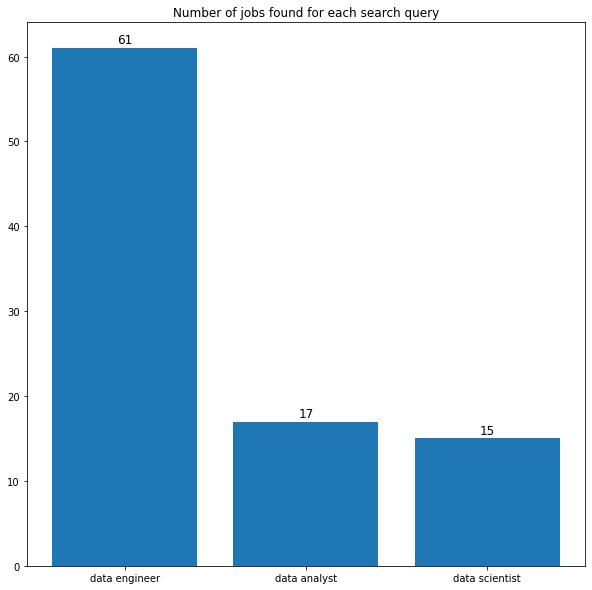

In [109]:
# Number of jobs found for each search query

plt.figure(figsize=(10, 10))

plt.bar(job_titles, job_count)
plt.title('Number of jobs found for each search query')

for elem in range(len(job_titles)):
    plt.text(elem, job_count[elem] + 1, job_count[elem], va='center', ha='center', size='large')

plt.show()

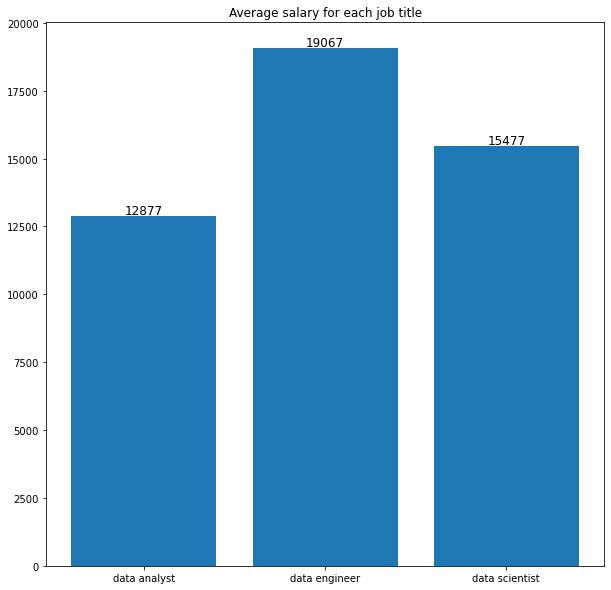

In [126]:
# Average salary for each job title

avg_salaries = {}

for key in df_grouped.groups.keys():
    avg_salaries[key] = round(df_grouped.get_group(key)['salary_average'].mean())

plt.figure(figsize=(10, 10))
plt.bar(avg_salaries.keys(), avg_salaries.values())
plt.title('Average salary for each job title')

for key, value in avg_salaries.items():
    plt.text(key, value+200, value, va='center', ha='center', size='large')
    
plt.show()

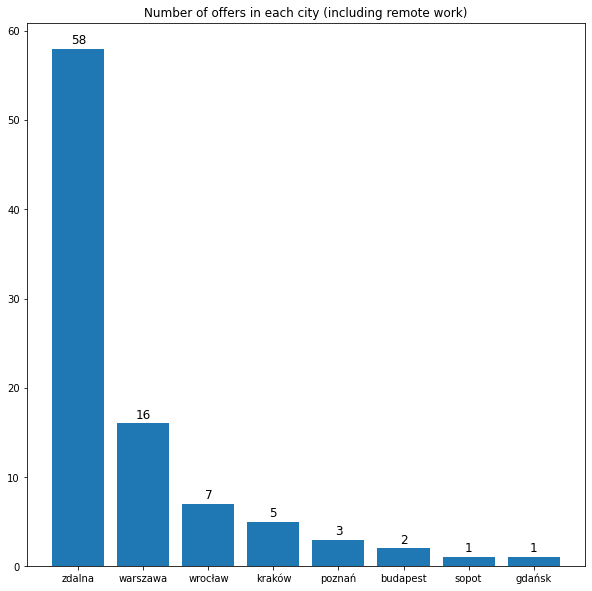

In [138]:
# Number of offers in each city (including remote work)

offers_count = df['location_city'].value_counts()
cities = df['location_city'].value_counts().index

plt.figure(figsize=(10, 10))

plt.bar(cities, offers_count)
plt.title(r'Number of offers in each city (including remote work)')

for elem in range(len(cities)):
    plt.text(elem, offers_count[elem] + 1, offers_count[elem], va='center', ha='center', size='large')

plt.show()

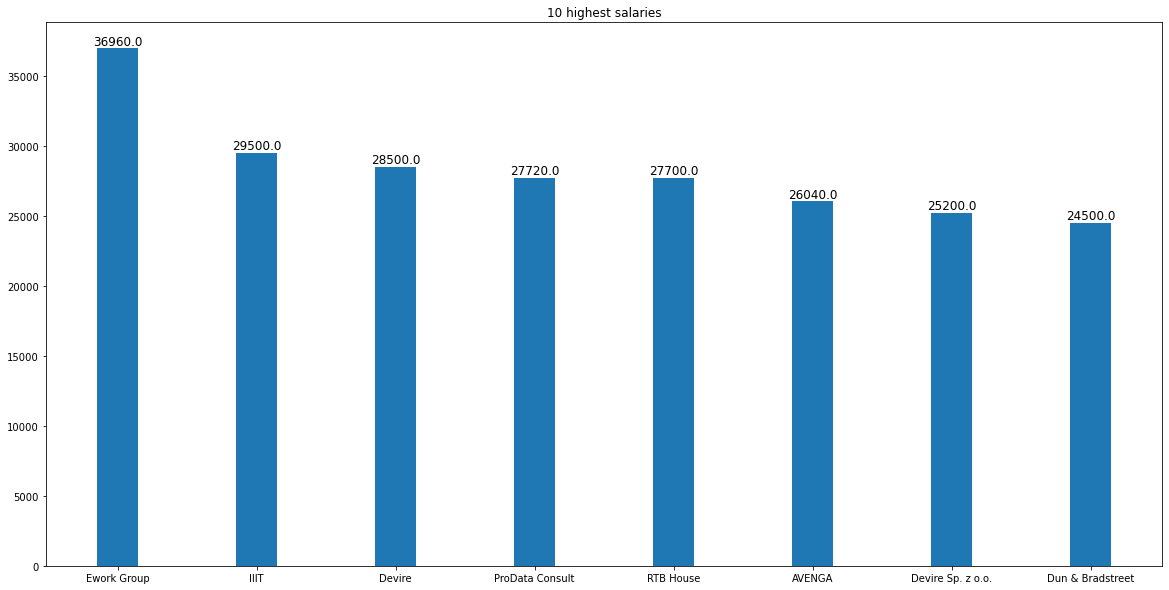

In [162]:
# Finding the highest salaries

df_sorted = df.sort_values('salary_average', ascending=False)
df_highest_salaries = df_sorted.head(10)
companies = df_highest_salaries['company'].unique()
salaries = df_highest_salaries['salary_average'].unique()

plt.figure(figsize=(20, 10))

plt.bar(companies, salaries, align='center', width=0.3)
plt.title('10 highest salaries')

for elem in range(salaries.shape[0]):
    plt.text(companies[elem], salaries[elem]+500, salaries[elem], va='center', ha='center', size='large')

plt.show()

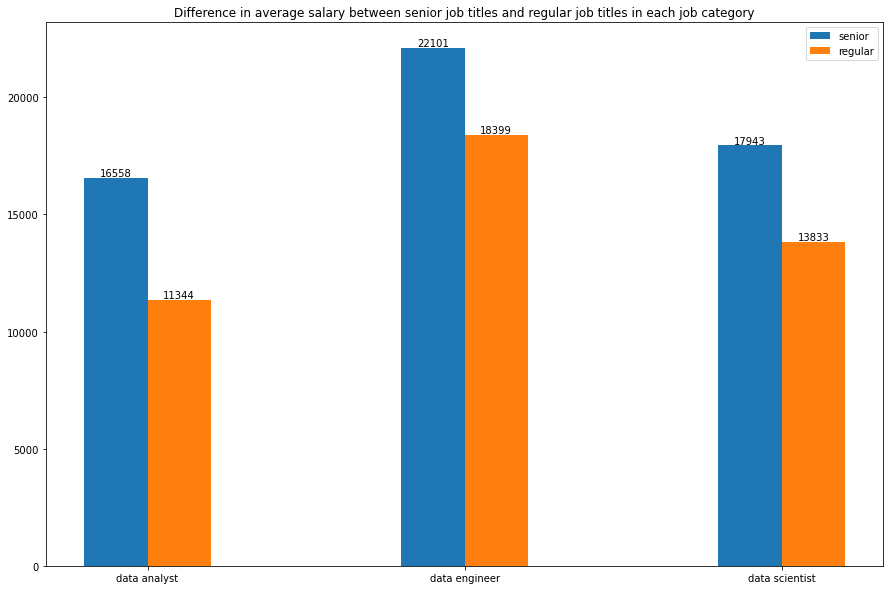

In [133]:
# Difference in salary between senior job titles and regular job titles in each job category

df_grouped_by_job = df.groupby(['job', 'is_senior'])
senior_avg_salaries = {}
non_senior_avg_salaries = {}

for (job, is_senior) in df_grouped_by_job.groups.keys():
    if is_senior:
        senior_avg_salaries[job] = df_grouped_by_job.get_group((job, is_senior))['salary_average'].mean()
    else:
        non_senior_avg_salaries[job] = df_grouped_by_job.get_group((job, is_senior))['salary_average'].mean()

x = np.array(range(len(senior_avg_salaries.keys())))
y_senior = np.array(list(senior_avg_salaries.values()))
y_non_senior = np.array(list(non_senior_avg_salaries.values()))

plt.figure(figsize=(15, 10))
ax = plt.subplot(111)
ax.bar(
    x-0.1, 
    y_senior,
    width = 0.2,
    label='senior'
)
ax.bar(
    x+0.1, 
    y_non_senior,
    width = 0.2,
    label='regular',
)

for i in range(len(senior_avg_salaries.keys())):
    plt.text(i-0.1, y_senior[i]+200, round(y_senior[i]), va='center', ha='center')
    plt.text(i+0.1, y_non_senior[i]+200, round(y_non_senior[i]), va='center', ha='center')

plt.xticks(range(3), list(df['job'].unique()))
plt.legend()
plt.title('Difference in average salary between senior job titles and regular job titles in each job category')

plt.show()

In [77]:
# Rounding up a team consisting of data analyst, data engineer and data scientist, while minimizng the cost of hiring them

cost = df.groupby('job')['salary_average'].min().sum()

print(f"Minimal cost of hiring a team consisting of data analyst, data engineer and data scientist: {cost}")

Minimal cost of hiring a team consisting of data analyst, data engineer and data scientist: 20724.5


In [132]:
# Finding out in wich city (including remote work) it's possible to round up the whole team, while minimizing the cost of hiring
 
df_grouped = df.groupby(['location_city', 'job'])['salary_average'].min().reset_index(name='min_salary')
min_cost = df['salary_average'].max()

for city in df_grouped['location_city'].unique():
    num_of_jobs = df_grouped.loc[df_grouped['location_city'] == city]['job'].count()
    cost = df_grouped.loc[df_grouped['location_city'] == city]['min_salary'].sum()
    
    if num_of_jobs == 3 and cost < min_cost:
        min_cost = cost
        location = city
    else:
        cost = None
        
if cost:
    print("It's not possible to round up the whole team in one city")
else:
    print(f"The cost of hiring the whole team in {location}: {min_cost}")


The cost of hiring the whole team in warszawa: 21350.0
